In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [ ]:
df = pd.read_csv("spam.csv", encoding="latin-1")  # Load dataset
df = df[['v1', 'v2']]  # Keep only relevant columns
df.columns = ['label', 'message']  # Rename columns

In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['label'] = df['label'].map({'ham':0, 'spam':1})

In [ ]:
# Initialize stopwords and stemmer
nltk.download('stopwords')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Text preprocessing function
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    text = [stemmer.stem(word) for word in text if word not in stop_words]  # Remove stopwords & apply stemming
    return " ".join(text)

df['cleaned_message'] = df['message'].apply(clean_text)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned_message']).toarray()
y = df['label']

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NAIVE BAYES ALGORITHM

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



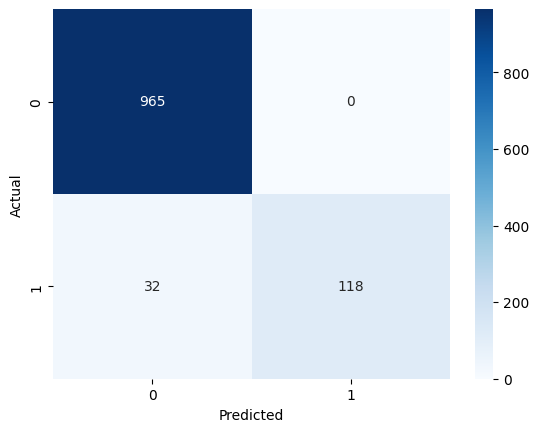

In [ ]:
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Example prediction

def predict_email(text):
    text = clean_text(text)
    text_vectorized = tfidf_vectorizer.transform([text]).toarray()
    prediction = model.predict(text_vectorized)
    return "Spam" if prediction[0] == 1 else "Not Spam"

# Example
new_email = "You won a lottery of $10,000! Claim now."
print(predict_email(new_email))


Spam


In [ ]:
# Save the trained model and TF-IDF vectorizer
#joblib.dump(model, "spam_model.pkl")
#joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']